<a href="https://colab.research.google.com/github/kentaterasaki/Coral-Reef-Topic-Modeling/blob/main/Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


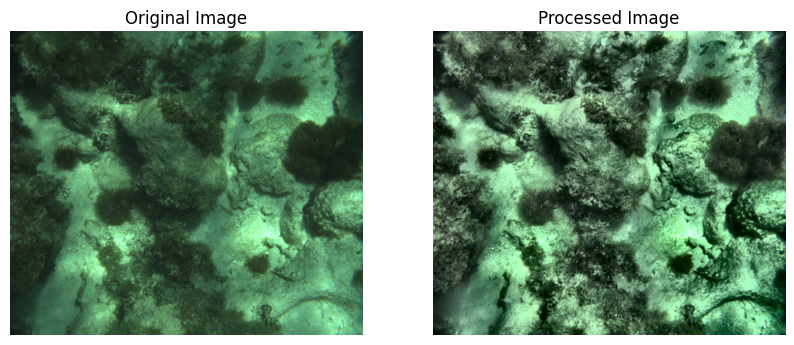

Processed and saved: Copy of png_array_3528_1716299733811194379_271913409439.png


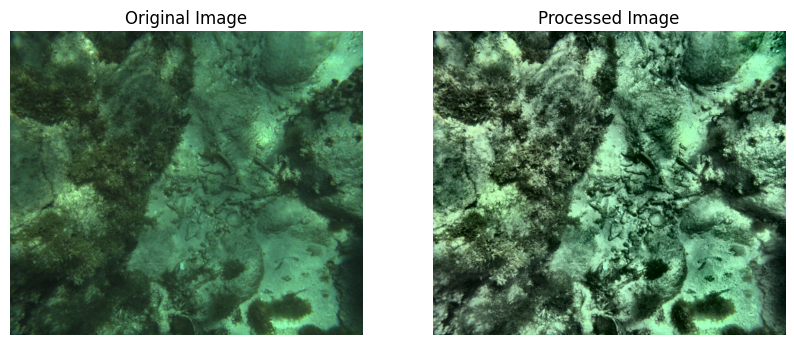

Processed and saved: Copy of png_array_3530_1716299735251099254_272028400179.png


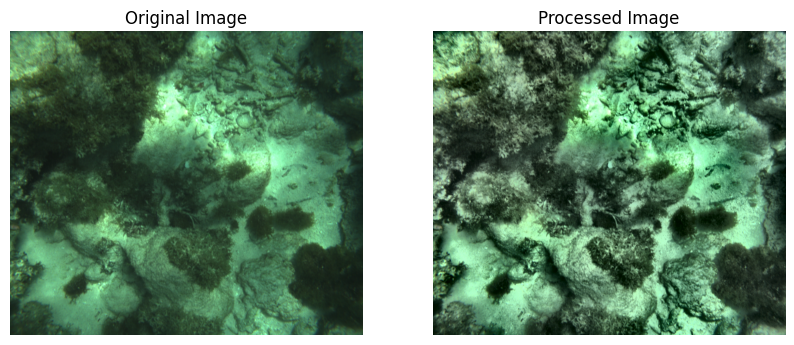

Processed and saved: Copy of png_array_3529_1716299734531130678_271970904809.png


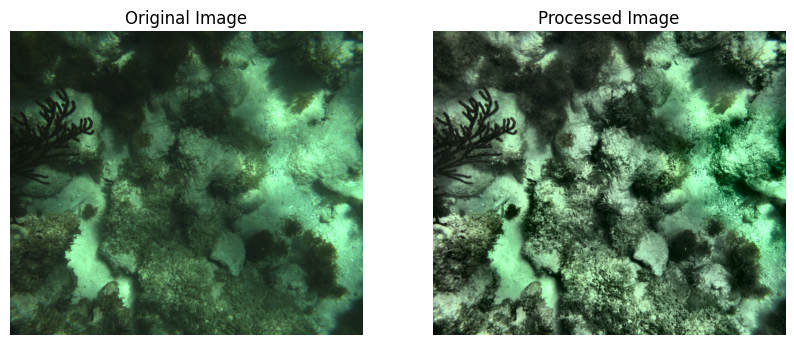

Processed and saved: Copy of png_array_3524_1716299730931302715_271683427959.png


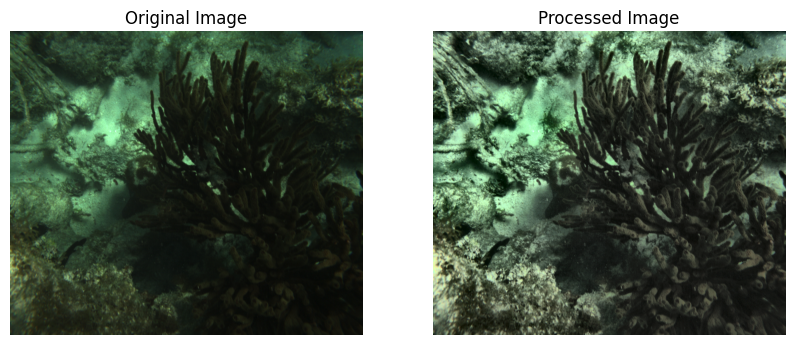

Processed and saved: Copy of png_array_3526_1716299732370993461_271798418699.png


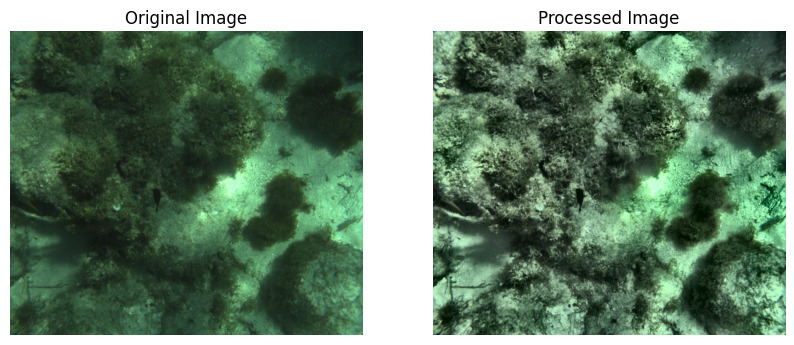

Processed and saved: Copy of png_array_3527_1716299733091328732_271855914069.png


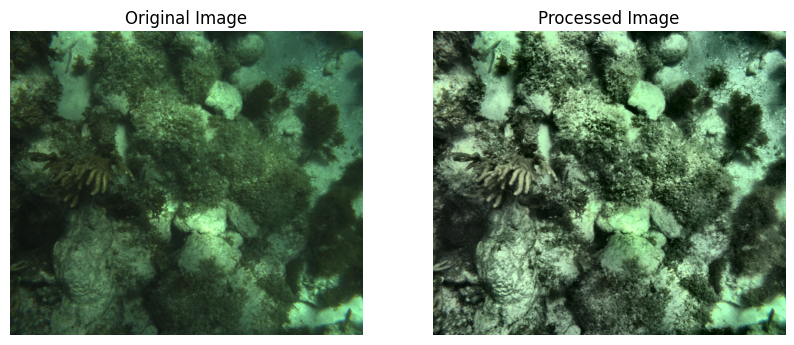

Processed and saved: Copy of png_array_3523_1716299730211179127_271625932589.png


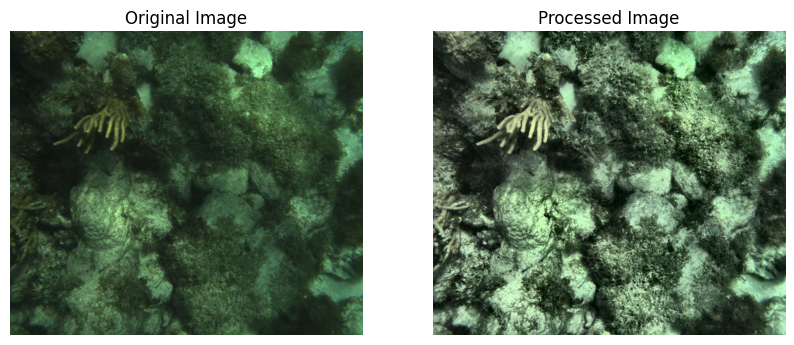

Processed and saved: Copy of png_array_3522_1716299729491715966_271568437219.png


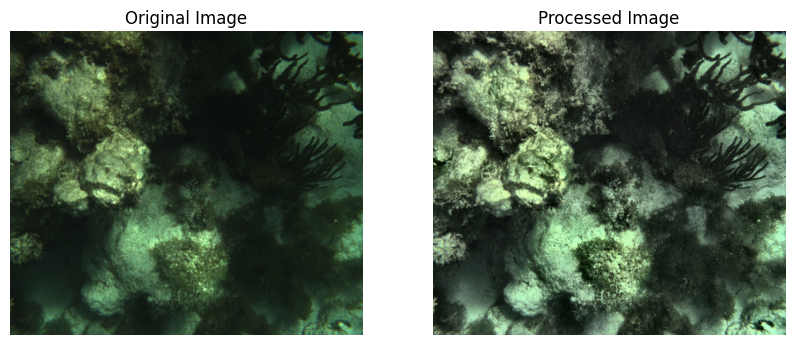

Processed and saved: Copy of png_array_3525_1716299731651496073_271740923329.png


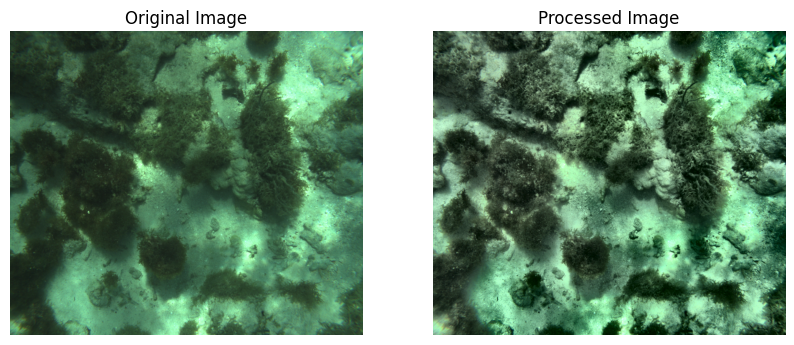

Processed and saved: Copy of png_array_3511_1716299721572868014_270935988149.png
All images have been processed, saved to the output folder, and visualized.


In [ ]:
import cv2
import numpy as np
import os
from google.colab import drive
from matplotlib import pyplot as plt

drive.mount('/content/drive')

# Define input and output folder paths
input_folder = '/content/drive/MyDrive/0521_coral_images/images'
output_folder = '/content/drive/MyDrive/0521_coral_images/filtered_images'

os.makedirs(output_folder, exist_ok=True)

# Function for color normalization
def color_normalization(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to L-channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    normalized_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return normalized_image

# Process and visualize each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        img_path = os.path.join(input_folder, filename)
        image = cv2.imread(img_path)
        normalized = color_normalization(image)
        final = normalized
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, final)

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        filtered_rgb = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(filtered_rgb)
        plt.title('Processed Image')
        plt.axis('off')

        plt.show()

        print(f"Processed and saved: {filename}")
print("All images have been processed, saved to the output folder, and visualized.")
